In [61]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
            #  to predict the closing price of Amazon corporation.

In [62]:
# To predict closing price of a stock with input of past 60 days stock price.

In [63]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date

In [64]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('AMZN', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index = df.index[::-1])
print(df)

                Open      High       Low     Close     Volume
Date                                                         
2012-01-03    8.7945    8.9740    8.7775    8.9515  102219400
2012-01-04    8.9570    9.0250    8.8035    8.8755   84107480
2012-01-05    8.7970    8.9125    8.7025    8.8805   76196760
2012-01-06    8.9035    9.2325    8.8750    9.1305  140196780
2012-01-09    9.1310    9.2185    8.8500    8.9280  101136840
...              ...       ...       ...       ...        ...
2023-09-07  133.9000  138.0300  133.1600  137.8500   48498912
2023-09-08  136.8600  138.8519  136.7500  138.2300   38365929
2023-09-11  138.7500  143.6200  138.6400  143.1000   56764525
2023-09-12  142.3200  143.0000  140.6100  141.2300   42668452
2023-09-13  140.9500  144.9800  140.8650  144.8500   60465175

[2943 rows x 5 columns]


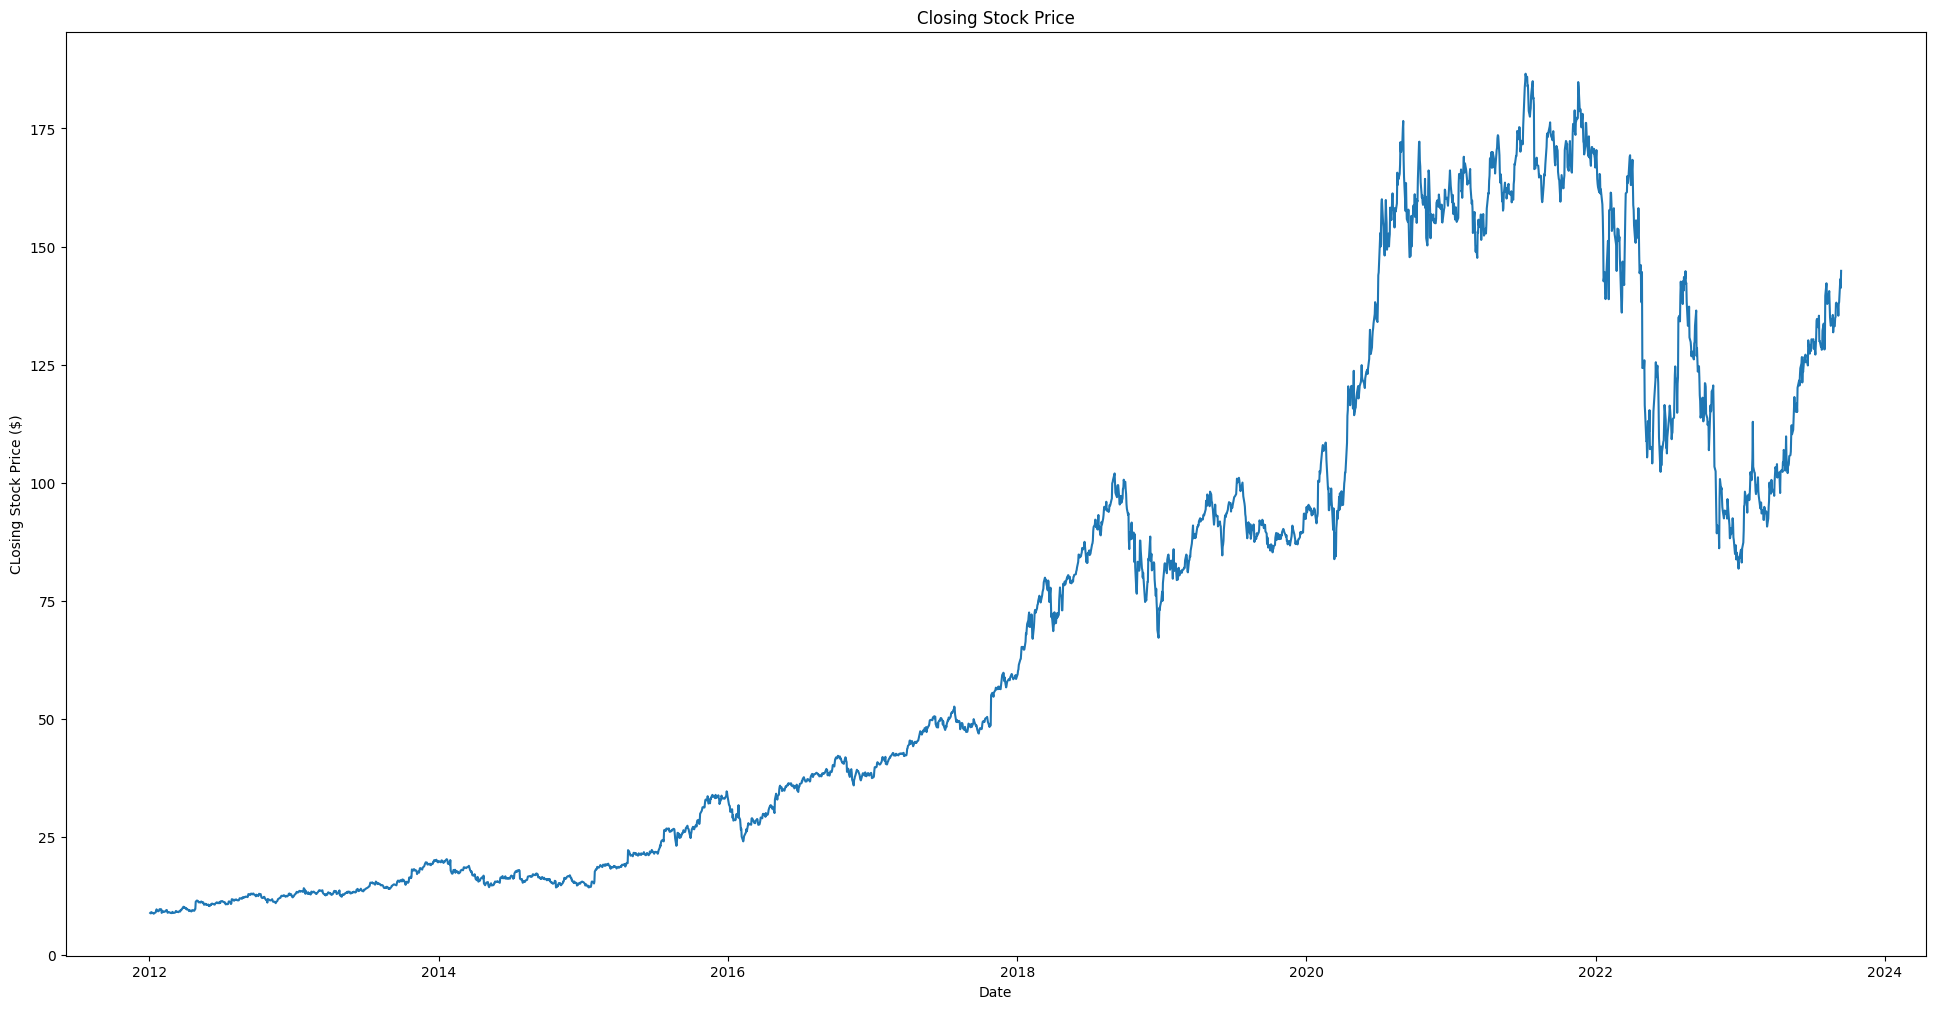

In [65]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(24,12))
plt.title("Closing Stock Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("CLosing Stock Price ($)")
plt.show()

In [66]:
#Create A New DataFrame with only Close column
data = df.filter(['Close'])
#Convert DataFrame To Numpy Array
dataset = data.values

# Training -> 80% data
# Testing -> 20% data

training_data_len = math.ceil((len(dataset)) * 0.8)
print(training_data_len)

2355


In [67]:
print(dataset)

[[  8.9515]
 [  8.8755]
 [  8.8805]
 ...
 [143.1   ]
 [141.23  ]
 [144.85  ]]


In [68]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[8.71895980e-04]
 [4.44385693e-04]
 [4.72511370e-04]
 ...
 [7.55475366e-01]
 [7.44956363e-01]
 [7.65319353e-01]]


In [69]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [70]:
print(x_train[0])
print(y_train[0])

[0.0008719  0.00044439 0.00047251 0.0018788  0.00073971 0.00095909
 0.00083533 0.         0.00070033 0.0016116  0.00379978 0.00520888
 0.00421885 0.00285757 0.00311351 0.00333852 0.00489106 0.00546763
 0.00456198 0.00520606 0.00099284 0.00162848 0.00330477 0.00202786
 0.00232318 0.002686   0.00254537 0.00270288 0.00440448 0.00432292
 0.00240193 0.00112503 0.00184786 0.00178036 0.00130784 0.00083252
 0.00090002 0.00073127 0.00221349 0.00105753 0.00115597 0.00094784
 0.00121784 0.00145128 0.00220505 0.00329352 0.00235974 0.00209818
 0.00243568 0.00178036 0.00239068 0.00256506 0.00269725 0.00461261
 0.00444386 0.0046323  0.00537482 0.00757706 0.00829989 0.00709611]
0.008066444098811125


In [71]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [72]:
unscaled_data = scaler.inverse_transform(dataset)
print(unscaled_data)

[[ 1600.13598525]
 [ 1586.62519925]
 [ 1587.51406675]
 ...
 [25448.18435   ]
 [25115.747905  ]
 [25759.287975  ]]


In [73]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [74]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) # Input Layer
model.add(LSTM(50, return_sequences = False)) # Long Term Memory Layer
model.add(Dense(25)) # Short Term Memory Layer
model.add(Dense(1)) # Forget Gate

In [75]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 7s 109ms/step - loss: 0.0174
Epoch 2/64
23/23 [==============================] - 2s 86ms/step - loss: 9.6472e-04
Epoch 3/64
23/23 [==============================] - 2s 86ms/step - loss: 3.6013e-04
Epoch 4/64
23/23 [==============================] - 2s 85ms/step - loss: 3.1975e-04
Epoch 5/64
23/23 [==============================] - 2s 86ms/step - loss: 3.1840e-04
Epoch 6/64
23/23 [==============================] - 3s 111ms/step - loss: 3.1259e-04
Epoch 7/64
23/23 [==============================] - 3s 108ms/step - loss: 3.1471e-04
Epoch 8/64
23/23 [==============================] - 2s 85ms/step - loss: 3.2940e-04
Epoch 9/64
23/23 [==============================] - 2s 86ms/step - loss: 3.5443e-04
Epoch 10/64
23/23 [==============================] - 2s 85ms/step - loss: 3.1093e-04
Epoch 11/64
23/23 [==============================] - 2s 86ms/step - loss: 2.9393e-04
Epoch 12/64
23/23 [==============================] - 3s 110ms/step - loss: 

In [76]:
# Create a Testing Dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [77]:
# Convert Data Into Numpy Array
x_test = np.array(x_test)
# Reshape The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [78]:
# Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Error % = ", rmse)
print("Accuracy % = ", (100-rmse))

19/19 [==============================] - 2s 25ms/step
Error % =  5.186892550803598
Accuracy % =  94.81310744919641


<ipython-input-79-c8af41b10fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


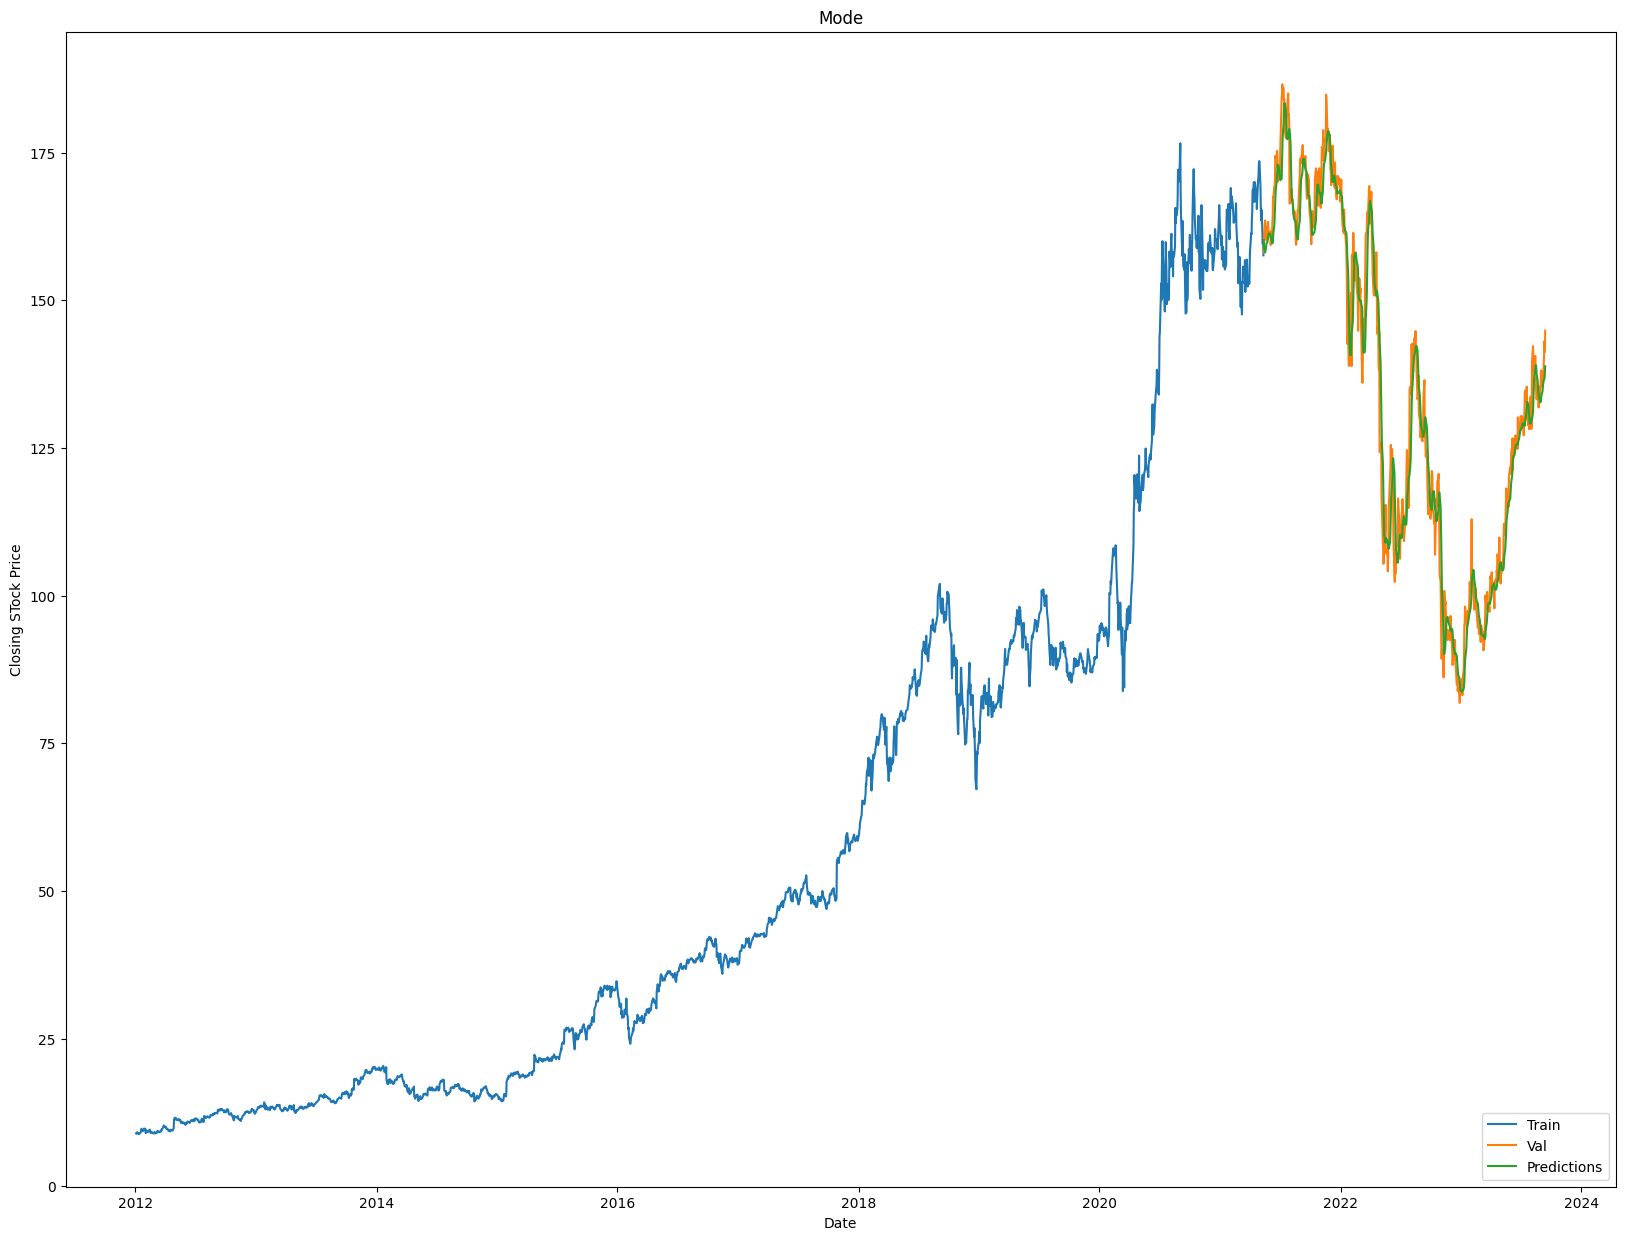

In [79]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,15))
plt.title("Mode")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [80]:
# Use Model to Predict Future Price
Google_quote = web.DataReader('GOOGL', data_source = 'stooq', start = startDate, end = endDate)
new_df = Google_quote.filter(['Close'])
last_60_days = new_df[:60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 54ms/step
[[121.00811]]
